In [3]:
import soundfile as sf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from signalTeste import *
import time
import pickle
import peakutils
%matplotlib inline

In [6]:
sig = signalMeu()
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1

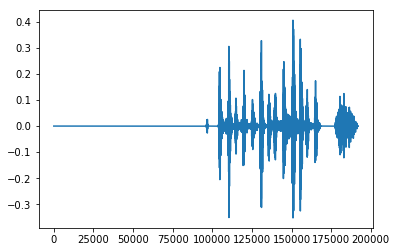

In [7]:
duration = 4
myrecording = sd.rec(int(duration * fs))
sd.wait()
plt.plot(myrecording)
plt.show()